In [1]:
#import all necessary libraries
import sqlite3 as sq3
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#connect with the olist database
conn = sq3.connect("olist.db")

# creating cursor to access sqlite master
cur = conn.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(pd.Series(table_list))

0         (olist_order_customer_dataset,)
1                  (olist_order_dataset,)
2          (olist_order_reviews_dataset,)
3         (olist_order_payments_dataset,)
4            (olist_order_items_dataset,)
5               (olist_products_dataset,)
6                (olist_sellers_dataset,)
7            (olist_geolocation_dataset,)
8    (product_category_name_translation,)
dtype: object


In [3]:
#create dataframe from the tables needed for analysis

dforder = pd.read_sql_query("SELECT * FROM olist_order_dataset", conn)
dforder.set_index("index", inplace=True)

dforder_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", conn)
dforder_items.set_index("index", inplace=True)

dfproducts = pd.read_sql_query("SELECT * FROM olist_products_dataset", conn)
dfproducts.set_index("index", inplace=True)

dfprod_translation = pd.read_sql_query("SELECT * FROM product_category_name_translation", conn)
dfprod_translation.set_index("index", inplace=True)


In [4]:
#select the necessary columns from order table
dforder = dforder[['order_id','order_purchase_timestamp']]
dforder

,order_id,order_purchase_timestamp
index,,
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43


In [5]:
#select the necessary columns from order item table
dforder_items = dforder_items[['order_id','order_item_id','product_id','price']]
dforder_items

,order_id,order_item_id,product_id,price
index,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90


In [6]:
#merge order and order items table for analysis purpose
order_new = pd.merge(dforder, dforder_items, on="order_id", how="left")
order_new

,order_id,order_purchase_timestamp,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90
113421,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,1.0,b80910977a37536adeddd63663f916ad,205.99
113422,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99
113423,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


In [7]:
#data cleansing: check the null data
order_new.isna().sum()

order_id                      0
order_purchase_timestamp      0
order_item_id               775
product_id                  775
price                       775
dtype: int64

Data yang null ada sebanyak 775 rows atau sebesar 0.683% dan semua data null terletak pada order_item_id, product_id, dan price. Asumsinya data null ini adalah order yang statusnya canceled, dan karena jumlahnya sangat sedikit atau tidak signifikan dibandingkan dengan keseluruhan data, makan akan kita ignore, lagipula kita tidak melakukan analisis terhadap jumlah order.

In [9]:
order_new.dtypes

order_id                     object
order_purchase_timestamp     object
order_item_id               float64
product_id                   object
price                       float64
dtype: object

In [12]:
order_new.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


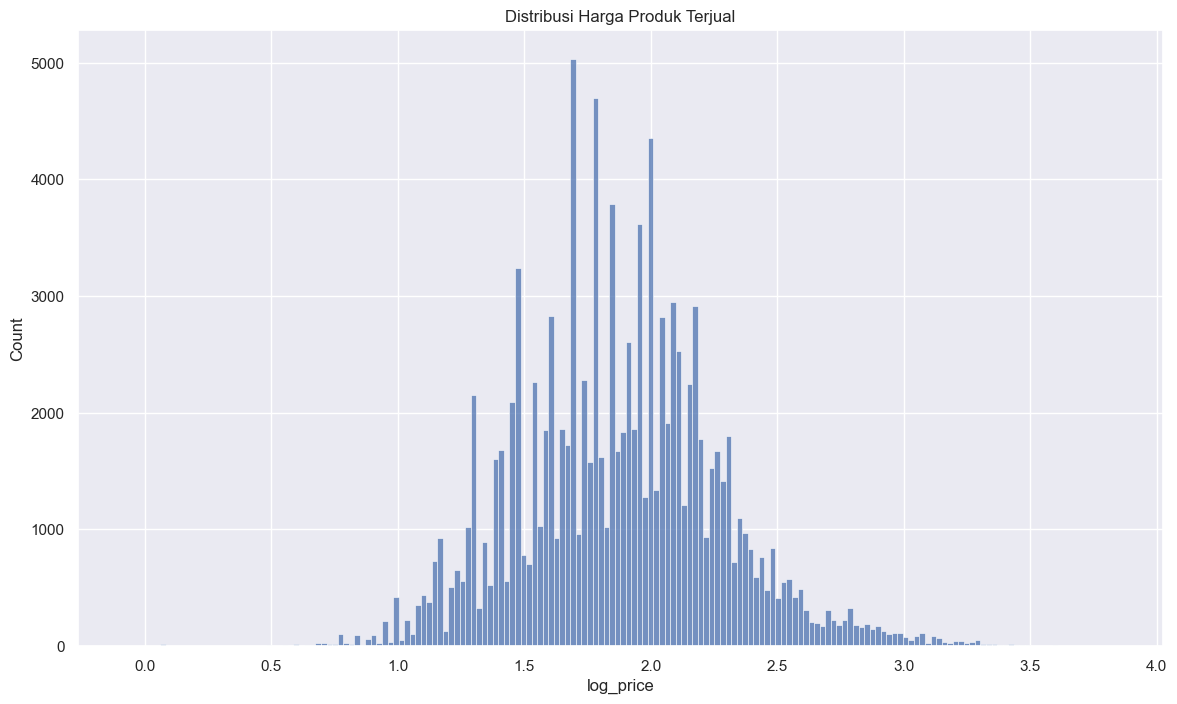

In [15]:
# checking price data distribution
sns.set(rc={'figure.figsize':(14,8)})

order_new["log_price"] = np.log10(order_new["price"])
sns.histplot(data = order_new, x = 'log_price').set_title("Distribusi Harga Produk Terjual")
plt.show()

In [16]:
#select the necessary columns from products table
dfproducts = dfproducts[['product_id','product_category_name']]
dfproducts

,product_id,product_category_name
index,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho


In [17]:
#data cleansing: check the null data
dfproducts.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

In [18]:
#fill the null product category name with 'unknown' because we cannot identify the product category from product_id
dfproducts['product_category_name'] = dfproducts['product_category_name'].fillna('unknown')
dfproducts.isna().sum()

product_id               0
product_category_name    0
dtype: int64

In [19]:
#merge products table with product translation table to get the english name of the product category
product_cat = pd.merge(dfproducts, dfprod_translation, on="product_category_name", how="left")
product_cat

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


In [20]:
product_cat.isna().sum()

product_id                         0
product_category_name              0
product_category_name_english    623
dtype: int64

Terdapat 623 data null pada kolom product_category_name_english, namun, pada proses checking sebelumnya hanya ada 610 product category unknown. Hal ini menandakan ada 13 rows di mana product category name nya tidak ada pada table product translation

In [21]:
check_null = product_cat[product_cat.isna().any(axis=1)]
check_null

,product_id,product_category_name,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,unknown,NaN
128,d8dee61c2034d6d075997acef1870e9b,unknown,NaN
145,56139431d72cd51f19eb9f7dae4d1617,unknown,NaN
154,46b48281eb6d663ced748f324108c733,unknown,NaN
197,5fb61f482620cb672f5e586bb132eae9,unknown,NaN
...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,unknown,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,unknown,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,unknown,NaN
32772,fa51e914046aab32764c41356b9d4ea4,unknown,NaN


In [22]:
check_null['product_category_name'].unique()

array(['unknown', 'pc_gamer',
       'portateis_cozinha_e_preparadores_de_alimentos'], dtype=object)

Ternyata ada 2 categories yang belum ada pada table product translation. Maka akan kita tambahkan pada table tersebut, kemudian kita merge ulang table products dan product translation

In [23]:
#adding 2 categories to product translation table
dfprod_translation.loc[len(dfprod_translation.index)] = ['pc_gamer','pc_gamer'] 
dfprod_translation.loc[len(dfprod_translation.index)] = ['portateis_cozinha_e_preparadores_de_alimentos','portable_kitchen_food_preparation']
dfprod_translation.tail()

,product_category_name,product_category_name_english
index,,
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer
72,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_food_preparation


In [24]:
#re-merge products table with product translation table to get the english name of the product category
product_cat = pd.merge(dfproducts, dfprod_translation, on="product_category_name", how="left")
product_cat

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


In [25]:
product_cat.isna().sum()

product_id                         0
product_category_name              0
product_category_name_english    610
dtype: int64

In [26]:
product_cat['product_category_name_english'] = product_cat['product_category_name_english'].fillna('unknown')
product_cat.isna().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

In [27]:
#merge order table and product category table to proceed with the category analysis
category_analysis = pd.merge(order_new, product_cat, on="product_id", how="left") 
category_analysis

,order_id,order_purchase_timestamp,order_item_id,product_id,price,log_price,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,1.476976,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,2.074451,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,2.203848,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.653213,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,1.298853,papelaria,stationery
...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,2.242790,bebes,baby
113421,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,1.0,b80910977a37536adeddd63663f916ad,205.99,2.313846,eletrodomesticos_2,home_appliances_2
113422,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,2.255248,informatica_acessorios,computers_accessories
113423,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,2.255248,informatica_acessorios,computers_accessories


In [28]:
#check data types
category_analysis.dtypes

order_id                          object
order_purchase_timestamp          object
order_item_id                    float64
product_id                        object
price                            float64
log_price                        float64
product_category_name             object
product_category_name_english     object
dtype: object

In [29]:
# change the order_purchase_timestamp data type from object to date
category_analysis['order_purchase_timestamp'] = pd.to_datetime(category_analysis['order_purchase_timestamp'], yearfirst = True)

category_analysis.dtypes

order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_item_id                           float64
product_id                               object
price                                   float64
log_price                               float64
product_category_name                    object
product_category_name_english            object
dtype: object

In [30]:
#extract the month and year of the timestamp for analysis purpose
category_analysis['day'] = category_analysis['order_purchase_timestamp'].dt.day
category_analysis['month'] = category_analysis['order_purchase_timestamp'].dt.month
category_analysis['year'] = category_analysis['order_purchase_timestamp'].dt.year
category_analysis['hour'] = category_analysis['order_purchase_timestamp'].dt.hour

print(min(category_analysis['order_purchase_timestamp']))
print(max(category_analysis['order_purchase_timestamp']))

2016-09-04 21:15:19
2018-10-17 17:30:18


In [ ]:
check_sec = category_analysis[category_analysis['product_category_name_english']=='']


DATA ANALYTICS
1. Mencari product category dengan penjualan terbesar dan terkecil (top 10 and bottom 10)
2. Untuk category bottom 10, akan dilakukan analisa trend penjualan per category selama setahun terakhir (tahun 2018). Hal ini dilakukan untuk melihat category mana yang tidak mengalami peningkatan sama sekali dan category mana yang masih memiliki prospek dan butuh marketing support.
3. Untuk category top 10, akan dilihat jumlah produk dari masing-masing category. Hal ini dilakukan untuk melihat kemungkinan ditambahkan produk karena contribute high sales misalnya dengan cara edukasi penambahan produk pada seller.


In [31]:
#get bottom 10 categories
bottom_category = category_analysis[['product_category_name_english','price']].groupby(['product_category_name_english']).sum().sort_values(by = ['price'], ascending = True).head(10)
bottom_category

,price
product_category_name_english,
security_and_services,283.29
fashion_childrens_clothes,569.85
cds_dvds_musicals,730.00
home_comfort_2,760.27
flowers,1110.04
pc_gamer,1545.95
diapers_and_hygiene,1567.59
arts_and_craftmanship,1814.01
la_cuisine,2054.99


/Users/corneliakristianti/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


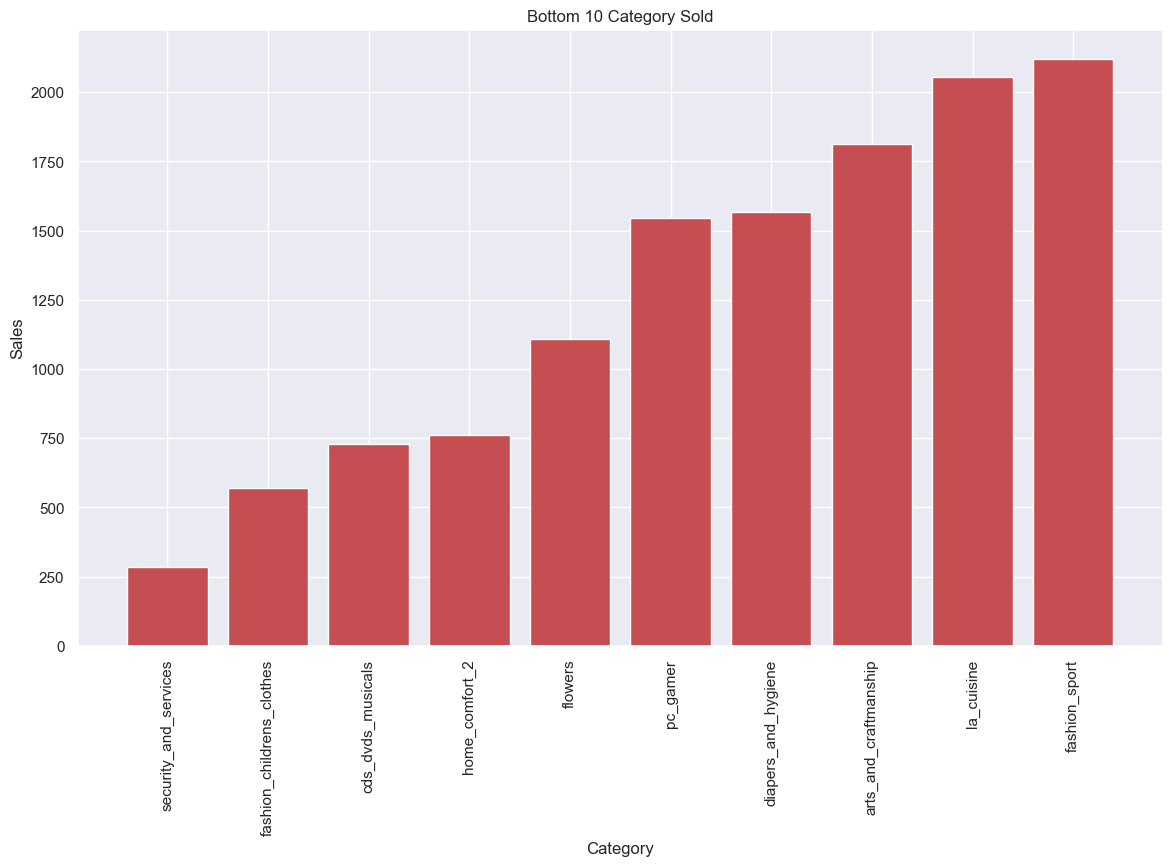

In [42]:
#showing bottom 10 categories in barchart

a = bottom_category.index
b = bottom_category.value_counts()[::1].index

plt.bar(a,b, color='r')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Bottom 10 Category Sold")
plt.show()

In [37]:
#filter the data only in 2018 for analysis purpose
cat_analysis_2018 = category_analysis[category_analysis['year']==2018]

#get the data of bottom 10 categories
bottom_growth = cat_analysis_2018.query('product_category_name_english in @bottom_category.index')
bottom_growth

,order_id,order_purchase_timestamp,order_item_id,product_id,price,log_price,product_category_name,product_category_name_english,day,month,year,hour
1441,3821dc9ac1b25bed42324d0885b0a930,2018-04-17 21:01:58,1.0,33900d427fa4bd3f509cdacda72e84a3,140.0,2.146128,la_cuisine,la_cuisine,17,4,2018,21
1442,3821dc9ac1b25bed42324d0885b0a930,2018-04-17 21:01:58,2.0,33900d427fa4bd3f509cdacda72e84a3,140.0,2.146128,la_cuisine,la_cuisine,17,4,2018,21
7129,fa612a1874826daa30fed5e3073b9d0d,2018-02-23 07:23:09,1.0,3fdb534dccf5bc9ab0406944b913787d,25.0,1.397940,fraldas_higiene,diapers_and_hygiene,23,2,2018,7
7130,fa612a1874826daa30fed5e3073b9d0d,2018-02-23 07:23:09,2.0,3fdb534dccf5bc9ab0406944b913787d,25.0,1.397940,fraldas_higiene,diapers_and_hygiene,23,2,2018,7
7131,fa612a1874826daa30fed5e3073b9d0d,2018-02-23 07:23:09,3.0,3fdb534dccf5bc9ab0406944b913787d,25.0,1.397940,fraldas_higiene,diapers_and_hygiene,23,2,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...
105436,79bf05438738958b495424724f6b27c5,2018-01-17 10:43:45,2.0,5fd35bd0069ce2a404716901326b1336,21.6,1.334454,flores,flowers,17,1,2018,10
105850,d4665434b01caa9dc3e3e78b3eb3593e,2018-06-18 05:22:00,1.0,6e7f4ae007302e93c5610894712289bb,60.0,1.778151,fraldas_higiene,diapers_and_hygiene,18,6,2018,5
107800,79b5579acdaecb745610365f3f181fce,2018-02-07 22:08:23,1.0,be0e6c61c2bcdd9a4d022ba67fd66189,65.9,1.818885,flores,flowers,7,2,2018,22
108311,4a8493d781a65dfb623103a5dedf44fa,2018-08-18 22:35:15,1.0,6727051471a0fc4a0e7737b57bff2549,219.0,2.340444,pc_gamer,pc_gamer,18,8,2018,22


In [38]:
#sales per category of bottom 10 categories in 2018
bottom_growth = pd.DataFrame(data = bottom_growth.groupby(['month', 'product_category_name_english'])['price'].sum()).sort_values(by = ['price'], ascending = False)
bottom_growth

price
month product_category_name_english        
8     arts_and_craftmanship          901.76
7     pc_gamer                       677.00
      arts_and_craftmanship          654.57
3     la_cuisine                     389.00
6     diapers_and_hygiene            321.00
1     flowers                        284.60
4     la_cuisine                     280.00
8     diapers_and_hygiene            231.89
      pc_gamer                       219.00
3     diapers_and_hygiene            163.00
4     flowers                        158.40
7     diapers_and_hygiene            149.80
4     diapers_and_hygiene            149.00
2     flowers                        134.48
      pc_gamer                       129.99
1     diapers_and_hygiene            125.00
      fashion_sport                  119.80
5     diapers_and_hygiene            117.00
1     la_cuisine                     112.00
6     flowers                        108.00
2     diapers_and_hygiene            100.00
6     fashion_childrens_clothes       89.99
3     fashion_sport                   89.90
4     fashion_sport                   89.90
5     arts_and_craftmanship           89.80
3     flowers                         89.67
      fashion_childrens_clothes       79.98
8     fashion_sport                   69.90
4     cds_dvds_musicals               65.00
7     flowers                         47.99
2     home_comfort_2                  38.70
7     home_comfort_2                  38.70
3     home_comfort_2                  34.99
6     home_comfort_2                  25.80
5     flowers                         16.40
4     arts_and_craftmanship           15.99
      home_comfort_2                  12.90

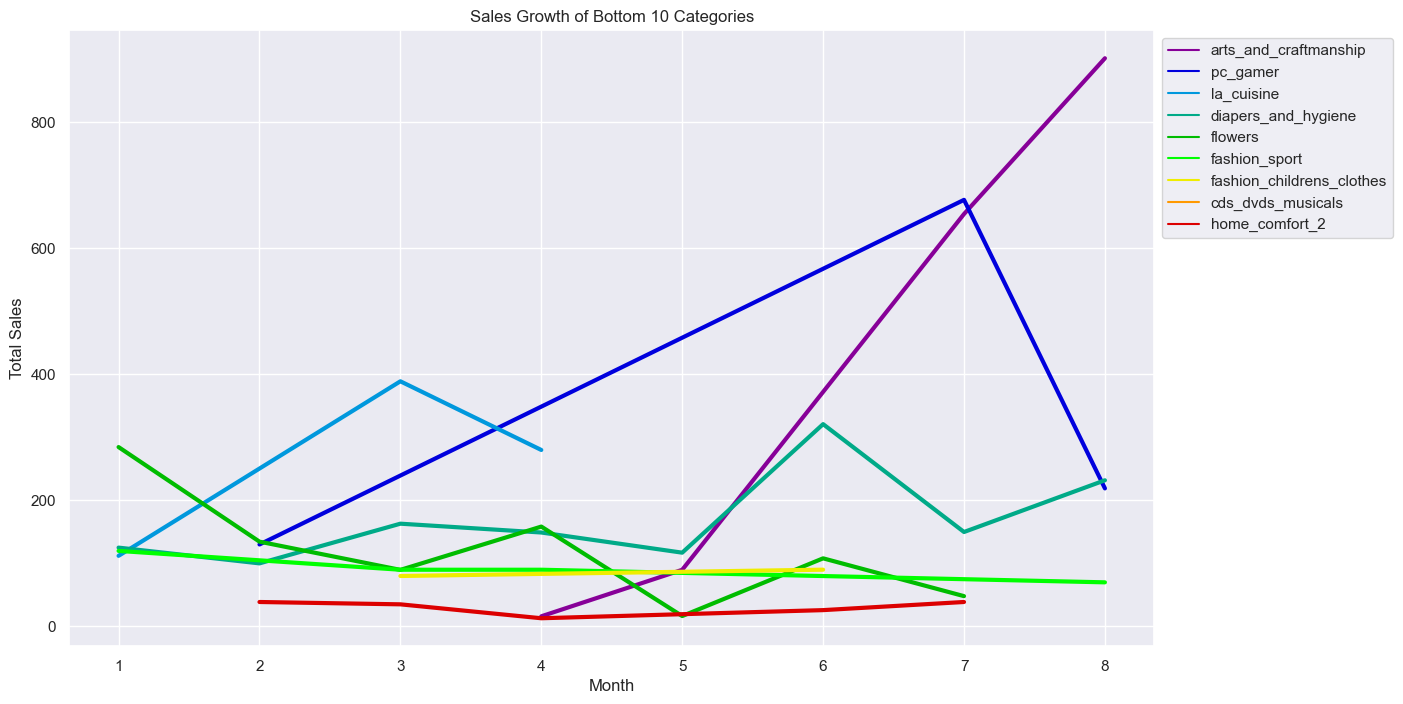

In [33]:
#showing the monthly sales trend for bottom 10 categories in 2018
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=bottom_growth, x ='month', y = 'price',
                  hue='product_category_name_english', palette='nipy_spectral',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Sales Growth of Bottom 10 Categories")
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

In [34]:
#get top 10 categories
top_category = category_analysis[['product_category_name_english','price']].groupby(['product_category_name_english']).sum().sort_values(by = ['price'], ascending = False).head(10)
top_category

,price
product_category_name_english,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32
furniture_decor,729762.49
cool_stuff,635290.85
housewares,632248.66
auto,592720.11


/Users/corneliakristianti/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


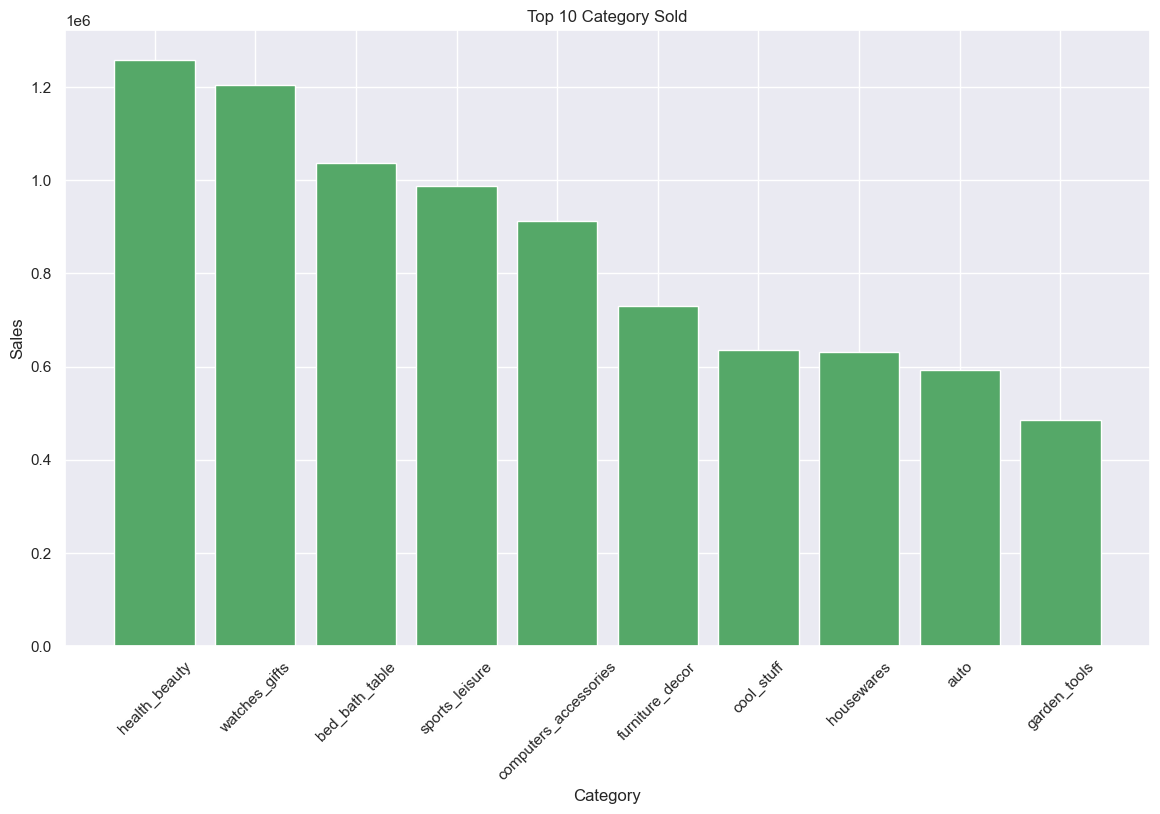

In [35]:
a = top_category.index
b = top_category.value_counts()[::-1].index

plt.bar(a,b, color='g')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Top 10 Category Sold")
plt.show()

In [36]:
product_topcategory = product_cat.query('product_category_name_english in @top_category.index')

product_per_top = pd.DataFrame(data = product_topcategory.groupby(['product_category_name_english'])['product_id'].count()).sort_values(by = ['product_id'], ascending = False)
product_per_top

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
watches_gifts,1329
cool_stuff,789


/Users/corneliakristianti/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


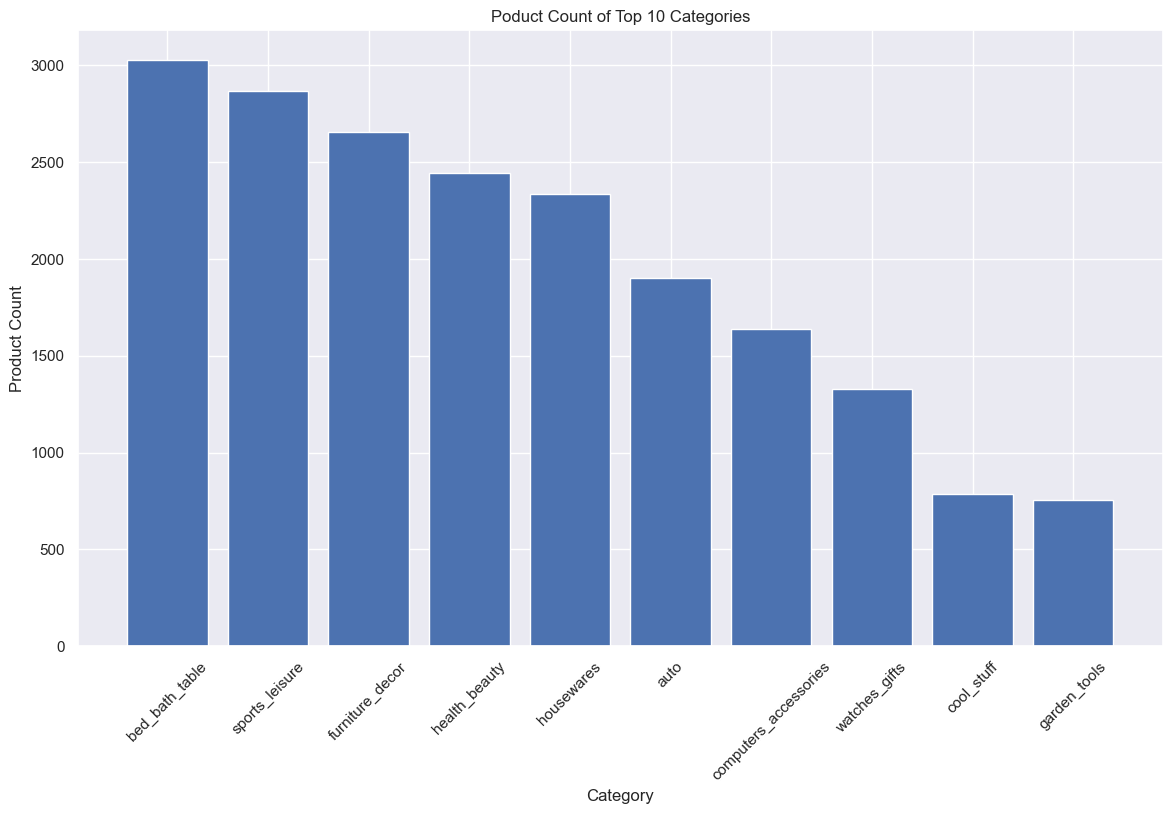

In [44]:
a = product_per_top.index
b = product_per_top.value_counts()[::-1].index

plt.bar(a,b, color='b')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Product Count")
plt.title("Poduct Count of Top 10 Categories")
plt.show()